In [5]:
import pandas as pd

# load both datasets
mat = pd.read_csv('data/student-mat.csv', sep=';')
por = pd.read_csv('data/student-por.csv', sep=';')

# label which course each record is from
mat['course'] = 'math'
por['course'] = 'portuguese'

# combine into one dataframe
df = pd.concat([mat, por], ignore_index=True)

# quick look at shape and first rows
df.shape, df.head(3)
df.columns
# Target variable (what we want to predict)
target = 'G3'

# Features = all columns except G3 and course (course we could drop for now)
X = df.drop(columns=['G3', 'course'])
y = df[target]

X.shape, y.shape
# show the shapes clearly
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1044, 32)
y shape: (1044,)


In [6]:
# Check which columns are non-numeric
non_numeric = X.select_dtypes(include='object').columns
non_numeric


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [7]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.shape


(1044, 41)

In [8]:
from sklearn.model_selection import train_test_split

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((835, 41), (209, 41))

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2.9158552839078213
R² Score: 0.8114035592877444


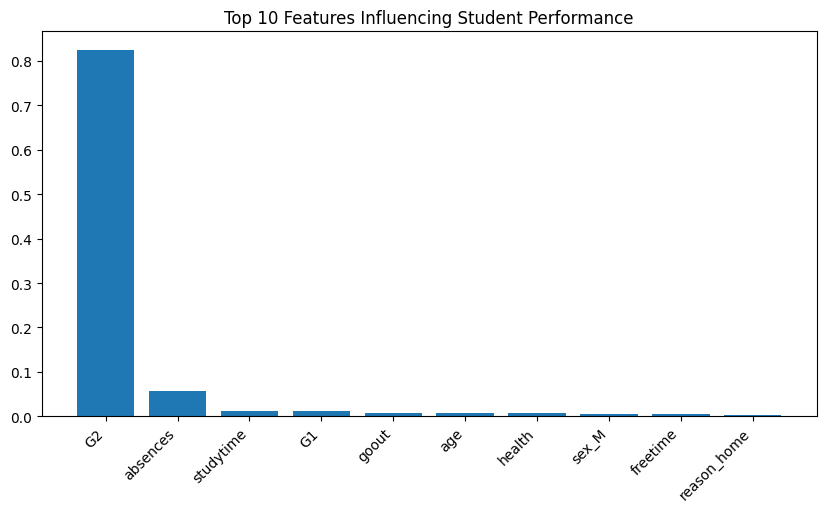

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10
plt.figure(figsize=(10,5))
plt.title("Top 10 Features Influencing Student Performance")
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), X_encoded.columns[indices[:10]], rotation=45, ha='right')
plt.show()


# Load data

# Define features/target

# Encode categoricals

# Train/Test split

# Train model & evaluate

# Feature importance